## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [102]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [103]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [104]:
df["price"] = np.log1p(df["price"])

In [105]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [106]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [107]:
y_train = df_train.price
y_val = df_val.price
y_test = df_test.price

In [108]:
del df_train["price"]
del df_val["price"]
del df_test["price"]

Now, use `DictVectorizer` to turn train and validation into matrices:

In [109]:
from sklearn.feature_extraction import DictVectorizer

In [110]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [113]:
from sklearn.tree import export_text

In [114]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [117]:
y_pred = rf.predict(X_val)
y_pred

array([4.87505509, 4.79647079, 5.38940092, ..., 5.15387428, 4.76825667,
       5.31395147])

In [118]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [119]:
rmse(y_val,y_pred)

0.46156323035140656

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [120]:
score = []
for est in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score.append(rmse(y_val,y_pred))
    print("est : %4s , rmse : %.3f " % (est, rmse(y_val,y_pred)))

est :   10 , rmse : 0.462 
est :   20 , rmse : 0.448 
est :   30 , rmse : 0.446 
est :   40 , rmse : 0.444 
est :   50 , rmse : 0.442 
est :   60 , rmse : 0.442 
est :   70 , rmse : 0.441 
est :   80 , rmse : 0.441 
est :   90 , rmse : 0.441 
est :  100 , rmse : 0.440 
est :  110 , rmse : 0.439 
est :  120 , rmse : 0.439 
est :  130 , rmse : 0.439 
est :  140 , rmse : 0.439 
est :  150 , rmse : 0.439 
est :  160 , rmse : 0.439 
est :  170 , rmse : 0.439 
est :  180 , rmse : 0.439 
est :  190 , rmse : 0.439 
est :  200 , rmse : 0.439 


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [155]:
score = []
for max_depth in (10, 15, 20, 25):
    print("Max Depth: %d" % max_depth)
    for est in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=est, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score.append(rmse(y_val,y_pred))
        print("est : %4s , rmse : %.3f " % (est, rmse(y_val,y_pred)))

Max Depth: 10
est :   10 , rmse : 0.446 
est :   20 , rmse : 0.442 
est :   30 , rmse : 0.441 
est :   40 , rmse : 0.441 
est :   50 , rmse : 0.441 
est :   60 , rmse : 0.441 
est :   70 , rmse : 0.441 
est :   80 , rmse : 0.441 
est :   90 , rmse : 0.440 
est :  100 , rmse : 0.440 
est :  110 , rmse : 0.440 
est :  120 , rmse : 0.440 
est :  130 , rmse : 0.440 
est :  140 , rmse : 0.440 
est :  150 , rmse : 0.440 
est :  160 , rmse : 0.440 
est :  170 , rmse : 0.440 
est :  180 , rmse : 0.440 
est :  190 , rmse : 0.440 
est :  200 , rmse : 0.440 
Max Depth: 15
est :   10 , rmse : 0.450 
est :   20 , rmse : 0.441 
est :   30 , rmse : 0.440 
est :   40 , rmse : 0.439 
est :   50 , rmse : 0.438 
est :   60 , rmse : 0.438 
est :   70 , rmse : 0.437 
est :   80 , rmse : 0.437 
est :   90 , rmse : 0.437 
est :  100 , rmse : 0.437 
est :  110 , rmse : 0.436 
est :  120 , rmse : 0.436 
est :  130 , rmse : 0.436 
est :  140 , rmse : 0.436 
est :  150 , rmse : 0.436 
est :  160 , rmse : 0.436 


What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [122]:
rf_fi = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_fi.fit(X_train, y_train)

yfi_pred = rf_fi.predict(X_val)
x = rf_fi.feature_importances_.round(3)
y = dv.get_feature_names()
print(list(zip(x,y)))
print(max(x),y[12])

[(0.076, 'availability_365'), (0.03, 'calculated_host_listings_count'), (0.153, 'latitude'), (0.154, 'longitude'), (0.053, 'minimum_nights'), (0.0, 'neighbourhood_group=Bronx'), (0.001, 'neighbourhood_group=Brooklyn'), (0.034, 'neighbourhood_group=Manhattan'), (0.001, 'neighbourhood_group=Queens'), (0.0, 'neighbourhood_group=Staten Island'), (0.042, 'number_of_reviews'), (0.054, 'reviews_per_month'), (0.392, 'room_type=Entire home/apt'), (0.004, 'room_type=Private room'), (0.005, 'room_type=Shared room')]
0.392 room_type=Entire home/apt


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [123]:
!pip install xgboost

In [124]:
import xgboost as xgb

In [125]:
features = dv.get_feature_names()

dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)

dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [126]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [141]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,num_boost_round=100,evals=watchlist)

In [142]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [143]:
scores = {}

In [148]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

Now change `eta` first to `0.1` and then to `0.01`

In [145]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,num_boost_round=100,evals=watchlist)

In [147]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,num_boost_round=100,evals=watchlist)

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

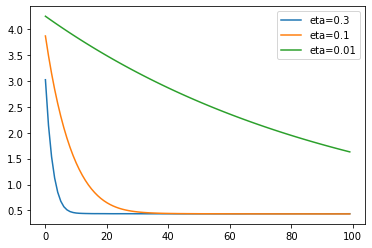

In [153]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()
plt.show()

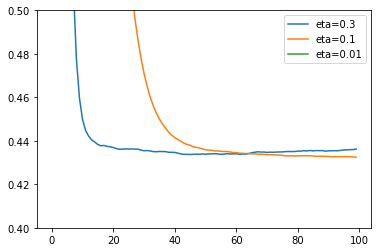

In [154]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    
plt.ylim(0.4, 0.5)
plt.legend()
plt.show()